In [1]:
import pandas as pd
import glob
import os
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dropbox_dir = "/Users/kendraziegler/Dropbox (Palmer Lab)"

#dropbox_dir = "C:/Users/cocoy/Dropbox (Palmer Lab)"
meta_dir = dropbox_dir + "/Suzanne_Mitchell_U01/Data-locomotor"


In [3]:
#Creating one dataframe with all locomotor files
#Must manually unzip all folders
#Must combine locomotor 5 files from T1&T2 and T3&T4 into one file named comprehensive_output_files
cohorts_dir = ['Shipment1_locomotor','Shipment2_locomotor','Shipment3_locomotor','Shipment4_locomotor',
              'Shipment5_locomotor','Shipment6_locomotor','ShipR_locomotor']
zip_folder = ['U01_Shipment1_Locomotor/comprehensive-output-files/','U01_Shipment2_Locomotor/S2-comprehensive-output-files/',
              'U01-Shipment3_Locomotor/S3-comprehensive-out-files/','comprehensive_output_files/comprehensive_output_files/',
              'comprehensive-output-files/','Ship6-comprehensive-output-files/S6-comprehensive-out-files/',
              'R-comprehensive-output-files/R-comprehensive-output-files/']
dir_dict = {cohorts_dir[i]: zip_folder[i] for i in range(len(cohorts_dir))}
count = 0
df_excel = pd.DataFrame()
df_csv = pd.DataFrame()
for cohort_dir,zip_folder in dir_dict.items():
        #for cohort in cohort_list:
        raw_dir = meta_dir + "/" + cohort_dir + "/" + zip_folder
        os.chdir(raw_dir)
        for file in os.listdir(raw_dir):
            if file.endswith('.xlsx'):
                df_excel = df_excel.append(pd.read_excel(file), ignore_index=True)
            elif file.endswith('.csv'):
                count += 1
                df_csv = df_csv.append(pd.read_csv(file, skiprows = 58), ignore_index=True)

                
df_csv
print(count)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


372


In [4]:
def format_df_csv():
    #make column headers uniform
    df_csv.columns = df_csv.columns.str.replace(':','')
    df_csv.columns = df_csv.columns.str.replace(' ','_')
    df_csv.columns = df_csv.columns.str.lower()
    
    df_csv.rename(columns={'subject_id':'rfid','duration_(s)':'duration','total_distance_(cm)':'total_distance',
                           'total_distance_x-axis_(cm)':'total_distance_x','total_distance_y-axis_(cm)':
                           'total_distance_y','rest_time_(s)':'rest_time','movement_time_(s)':'movement_time',
                           'ambulatory_time_(s)':'ambulatory_time','stereotypy_time_(s)':'stereotypy_time',
                           'vertical_activity_time_(s)':'vertical_activity_time','ambulatory_episode_average_velocity_(cm/s)':
                           'ambulatory_episode_average_velocity','ambulatory_episode_peak_average_velocity_(cm/s)':
                           'ambulatory_episode_peak_average_velocity','ambulatory_episode_median_velocity_(cm/s)':
                           'ambulatory_episode_median_velocity','left-front_time_legacy_(s)':'left-front_time_legacy',
                           'right-front_time_legacy_(s)':'right_front_time_legacy','counter-clockwise_revolutions':
                           'counter_clockwise_revolutions','left-rear_time_legacy_(s)':'left_rear_time_legacy',
                           'right-rear_time_legacy_(s)':'right_rear_time_legacy','margin_time_legacy_(s)':
                           'margin_time_legacy','center_time_legacy_(s)':'center_time_legacy','margin_distance_legacy_(cm)':
                           'margin_distance_legacy','center_distance_legacy_(cm)':'center_distance_legacy'},inplace = True)
    
    #Remove uneccesary columns
    #Below: column header(only value contained in column)
    #subject_sex(unknown), subject_treatment(NaN),unnamed_44(NaN),batch(batch 1), duration(60)
    df_csv.drop(['subject_sex', 'subject_treatment','unnamed_44','batch','duration'], axis=1, inplace = True)
    

        
        

format_df_csv()
df_csv

,ambulatory_activity_count,ambulatory_episode_average_velocity,ambulatory_episode_count,ambulatory_episode_median_velocity,ambulatory_episode_peak_average_velocity,ambulatory_time,cage,center_distance_legacy,center_time_legacy,clockwise_revolutions,...,stereotypy_time,subject_age,rfid,subject_type,total_distance,total_distance_x,total_distance_y,vertical_activity_count,vertical_activity_time,vertical_episode_count
0,545,12.80,1,14.31,28.33,6.11,Cage 1,131.26,24.49,0,...,1.48,11,46179,9-black,231.98,75.88,80.33,131,51.08,5
1,495,13.20,0,19.68,18.69,6.88,Cage 1,103.79,12.65,0,...,1.69,11,46179,9-black,256.13,70.17,107.95,121,54.89,4
2,579,12.79,0,16.80,19.75,7.33,Cage 1,204.45,24.62,4,...,1.62,11,46179,9-black,332.35,157.80,113.67,141,55.52,3
3,305,12.30,0,16.07,36.77,4.43,Cage 1,114.53,19.66,0,...,2.14,11,46179,9-black,176.24,79.38,44.77,106,53.44,5
4,419,8.38,0,10.51,17.83,8.45,Cage 1,153.27,21.35,1,...,4.69,11,46179,9-black,230.01,115.25,71.76,126,54.23,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22030,241,20.96,3,21.86,81.81,2.44,Cage 4,19.89,0.56,0,...,2.72,12,24857,5-black,111.70,49.85,23.81,61,37.20,9
22031,379,21.46,1,26.33,69.76,3.12,Cage 4,149.42,12.34,1,...,1.22,12,24857,5-black,246.68,134.30,79.06,85,35.12,8
22032,385,21.55,0,19.40,44.66,4.25,Cage 4,133.71,11.80,1,...,1.06,12,24857,5-black,271.73,115.57,115.89,81,35.16,9
22033,11,25.78,1,27.96,25.78,0.02,Cage 4,0.00,0.00,0,...,0.11,12,24857,5-black,8.25,7.30,0.00,33,10.61,12


In [5]:
#Load in master sheet in order to get the cohort value
#dropbox_dir = r'C:/Users/cocoy/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01'
dropbox_dir = r'/Users/kendraziegler/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01'

df_wfu = pd.read_csv(dropbox_dir + '/wfu_master.csv')
df_wfu

,cohort,sires,dames,labanimalid,accessid,sex,rfid,dob,dow,shipmentdate,...,coatcolor,earpunch,rack,shipmentbox,housingbox,shipmentage,weanage,comments,resolution,last_5
0,C01,72539_1,72595_5,TJ008,73472_2,F,933000320045906,2018-09-24,2018-10-15,2018-10-30,...,BROWNHOOD,RB,D-F4,2.0,9999.0,36.0,21.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45906
1,C01,73358_1,73360_1,TJ027,73477_2,F,933000320045890,2018-09-25,2018-10-16,2018-10-30,...,BROWNHOOD,LM,D-G8,4.0,32.0,35.0,21.0,NaN,NaN,45890
2,C01,72539_1,72595_5,TJ003,73472_8,M,933000320045902,2018-09-24,2018-10-15,2018-10-30,...,ALBINO,RT,D-F2,2.0,9999.0,36.0,21.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45902
3,C01,72794_1,72775_4,TJ020,73475_4,F,933000320045904,2018-09-25,2018-10-16,2018-10-30,...,BROWN,RB,D-G2,2.0,9999.0,35.0,21.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45904
4,C01,72624_1,72596_4,TJ002,73471_5,F,933000320045908,2018-09-23,2018-10-15,2018-10-30,...,BLACK,LT,D-F2,2.0,9999.0,37.0,22.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,C07,933000320048190,933000320187377,NaN,NaN,F,933000320125436,2020-08-09,2020-09-04,NaN,...,BLACK,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,25436
897,C07,933000320187153,933000320187383,NaN,NaN,F,933000320125437,2020-08-09,2020-09-04,NaN,...,BROWNHOOD,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,25437
898,C07,933000320187217,933000320048245,NaN,NaN,F,933000320125440,2020-08-09,2020-09-04,NaN,...,BROWN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,25440
899,C07,933000320187249,933000320048234,NaN,NaN,M,933000320125443,2020-08-08,2020-09-04,NaN,...,BLACKHOOD,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,25443


In [6]:
#Take the cohort value from the wfu and map it to the locomotor df
def locomotor_cohort(df_csv):
    #create an empty column for cohort for the locomotor df
    df_csv["cohort"] = np.nan

    #loop through each rfid in master table
    for i in df_wfu['last_5']:
        #find the index of the rfid
        a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
        #find the cohort of the rfid
        b = df_wfu.iloc[a]['cohort']
        #find all the indeces that have that rfid in locomotor df
        c = df_csv.loc[df_csv['rfid'] == i].index.tolist()
        #loop through each index
        for index in c:
            #set the cohort value at that index equal to the cohort from wfu_master
            df_csv.loc[index,'cohort'] = b

        
locomotor_cohort(df_csv)

In [7]:
def correcting_rfid(df_csv):
    #change rfid to unclude all 15 digits
    #C01-C04 9330003200 else 9330003201
    cohort_list_1 = ['C01','C02','C03','C04']
    cohort_list_2 = ['C05','C06','C07']
    for i in cohort_list_1:
        df_csv.loc[(df_csv.cohort == i),'rfid']= '9330003200' + df_csv['rfid'].astype(str)
    for i in cohort_list_2:
        df_csv.loc[(df_csv.cohort == i),'rfid']= '9330003201' + df_csv['rfid'].astype(str)
correcting_rfid(df_csv)
df_csv

,ambulatory_activity_count,ambulatory_episode_average_velocity,ambulatory_episode_count,ambulatory_episode_median_velocity,ambulatory_episode_peak_average_velocity,ambulatory_time,cage,center_distance_legacy,center_time_legacy,clockwise_revolutions,...,subject_age,rfid,subject_type,total_distance,total_distance_x,total_distance_y,vertical_activity_count,vertical_activity_time,vertical_episode_count,cohort
0,545,12.80,1,14.31,28.33,6.11,Cage 1,131.26,24.49,0,...,11,933000320046179,9-black,231.98,75.88,80.33,131,51.08,5,C01
1,495,13.20,0,19.68,18.69,6.88,Cage 1,103.79,12.65,0,...,11,933000320046179,9-black,256.13,70.17,107.95,121,54.89,4,C01
2,579,12.79,0,16.80,19.75,7.33,Cage 1,204.45,24.62,4,...,11,933000320046179,9-black,332.35,157.80,113.67,141,55.52,3,C01
3,305,12.30,0,16.07,36.77,4.43,Cage 1,114.53,19.66,0,...,11,933000320046179,9-black,176.24,79.38,44.77,106,53.44,5,C01
4,419,8.38,0,10.51,17.83,8.45,Cage 1,153.27,21.35,1,...,11,933000320046179,9-black,230.01,115.25,71.76,126,54.23,5,C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22030,241,20.96,3,21.86,81.81,2.44,Cage 4,19.89,0.56,0,...,12,933000320124857,5-black,111.70,49.85,23.81,61,37.20,9,C07
22031,379,21.46,1,26.33,69.76,3.12,Cage 4,149.42,12.34,1,...,12,933000320124857,5-black,246.68,134.30,79.06,85,35.12,8,C07
22032,385,21.55,0,19.40,44.66,4.25,Cage 4,133.71,11.80,1,...,12,933000320124857,5-black,271.73,115.57,115.89,81,35.16,9,C07
22033,11,25.78,1,27.96,25.78,0.02,Cage 4,0.00,0.00,0,...,12,933000320124857,5-black,8.25,7.30,0.00,33,10.61,12,C07


In [8]:
#All error corrections

#Correct 4 file experiment names. 
#'U01-t2-gp21', 'U01-t2-gp22' to 'U01-t1-gp21', 'U01-t1-gp22'
#'U01-t2a-gp21', 'U01-t2a-gp22' to 'U01-t2-gp21', 'U01-t2-gp22'
def correct_experiment(df):
    old_name = ['U01-t2-gp21', 'U01-t2-gp22','U01-t2a-gp21', 'U01-t2a-gp22']
    new_name = ['U01-t1-gp21', 'U01-t1-gp22','U01-t2-gp21', 'U01-t2-gp22']
    for name in old_name: 
        index = old_name.index(name)
        df.loc[(df.experiment == name) & (df.cohort == 'C05'),'experiment'] = new_name[index]

#87713 is in C05 but cannot be found in wfu_master
#87713 is a typo and should be 87173
#missing_cohort = locomotor_all[locomotor_all['cohort'].isna()]
#locomotor_all[locomotor_all['rfid'] == '933000320187173']
def fix_rfid(df):
    df['rfid'] = df['rfid'].astype(str)
    df.loc[(df.rfid == '87713'),'rfid'] = '933000320187173'
    df.loc[(df.rfid == '933000320187173'),'cohort'] = 'C05'

#need to remove 933000320046763 from file U01-t2-gp13; rat had tail injury in first file
#file U01-t2-gp13-B contains the correct data for rat
#will remove 15 rows from table
def remove_incorrect(df):
    df.drop(df.loc[(df.experiment == 'U01-t2-gp13') & (df.rfid == '933000320046763')].index, inplace = True)
    df.loc[(df.experiment == 'U01-t2-gp13-B'),'experiment'] = 'U01-t2-gp13'
    
#There is no U01-t1-gp2 in C05. Assume U01-t1-gp2a is its replacement
def file_rename(df):
    df.loc[(df.experiment == 'U01-t1-gp2a'),'experiment'] = 'U01-t1-gp2'
    #extra_file = locomotor_all[locomotor_all['experiment'] == 'U01-t1-gp2a']
    
remove_incorrect(df_csv)
fix_rfid(df_csv)
correct_experiment(df_csv)
file_rename(df_csv)


In [9]:
def splitting_cells(df):
    df['cage'] = df['cage'].str.replace('Cage ','')
    #df['phase'] = df['phase'].str.replace('Phase ','')
    #split cell based on -
    df['U01'] = df.experiment.str.split('-', expand = True)[0]
    df['time'] = df.experiment.str.split('-', expand = True)[1]
    df['file_num'] = df.experiment.str.split('-', expand = True)[2]

splitting_cells(df_csv)
#print(df_csv.columns)

In [25]:
def format_for_calc(df_csv):
    #drop uneeded columns for calc
    df = df_csv.drop(['U01','subject_type','subject_age','phase','start_time'], axis=1)
    #reorganize columns
    df = df[['experiment', 'rfid','cohort', 'time',
       'file_num', 'sample','cage', 'total_distance', 'total_distance_x',
       'total_distance_y', 'horizontal_activity_count',
       'ambulatory_activity_count', 'rest_time', 'rest_episode_count',
       'movement_time', 'movement_episode_count', 'ambulatory_time',
       'ambulatory_episode_count', 'stereotypy_time',
       'stereotypic_episode_count', 'stereotypic_activity_count',
       'stereotypic_episode_activity_count', 'vertical_episode_count',
       'vertical_activity_count', 'vertical_activity_time', 'jump_count',
       'clockwise_revolutions', 'counter_clockwise_revolutions',
       'ambulatory_episode_average_velocity',
       'ambulatory_episode_peak_average_velocity',
       'ambulatory_episode_median_velocity', 'left-front_time_legacy',
       'right_front_time_legacy', 'left_rear_time_legacy',
       'right_rear_time_legacy', 'margin_time_legacy', 'center_time_legacy',
       'margin_distance_legacy', 'center_distance_legacy']]
    #Drop rows that will not be used for calculations: C07, C06, t3, t4 according to Mitchell
    df.drop(df.loc[df['cohort']=='C07'].index, inplace=True)
    df.drop(df.loc[df['cohort']=='C06'].index, inplace=True)
    df.drop(df.loc[df['time']=='t3'].index, inplace=True)
    df.drop(df.loc[df['time']=='t4'].index, inplace=True)

    return df


locomotor = format_for_calc(df_csv)

In [26]:
#need to find where cohort 1 file U01-t2-gp6 is

In [27]:
locomotor

,experiment,rfid,cohort,time,file_num,sample,cage,total_distance,total_distance_x,total_distance_y,...,ambulatory_episode_peak_average_velocity,ambulatory_episode_median_velocity,left-front_time_legacy,right_front_time_legacy,left_rear_time_legacy,right_rear_time_legacy,margin_time_legacy,center_time_legacy,margin_distance_legacy,center_distance_legacy
0,U01-t1-gp5,933000320046179,C01,t1,gp5,1,1,231.98,75.88,80.33,...,28.33,14.31,1.00,1.88,0.00,1.06,35.51,24.49,100.72,131.26
1,U01-t1-gp5,933000320046179,C01,t1,gp5,2,1,256.13,70.17,107.95,...,18.69,19.68,0.00,0.00,0.00,6.47,47.35,12.65,152.35,103.79
2,U01-t1-gp5,933000320046179,C01,t1,gp5,3,1,332.35,157.80,113.67,...,19.75,16.80,0.75,0.00,0.00,0.33,35.38,24.62,127.90,204.45
3,U01-t1-gp5,933000320046179,C01,t1,gp5,4,1,176.24,79.38,44.77,...,36.77,16.07,0.00,0.00,0.00,7.55,40.35,19.66,61.70,114.53
4,U01-t1-gp5,933000320046179,C01,t1,gp5,5,1,230.01,115.25,71.76,...,17.83,10.51,0.00,0.28,0.00,1.81,38.65,21.35,76.74,153.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17950,U01-t2-gp17,933000320187192,C05,t2,gp17,11,4,344.59,163.83,115.57,...,29.67,31.84,0.55,2.80,2.02,1.80,51.05,8.95,250.67,93.91
17951,U01-t2-gp17,933000320187192,C05,t2,gp17,12,4,189.87,55.25,92.08,...,19.64,7.28,0.36,20.27,0.00,3.11,52.67,7.33,160.38,29.49
17952,U01-t2-gp17,933000320187192,C05,t2,gp17,13,4,81.09,34.93,20.00,...,32.90,8.64,0.00,19.81,4.52,0.00,57.52,2.48,40.88,40.21
17953,U01-t2-gp17,933000320187192,C05,t2,gp17,14,4,303.16,104.78,133.03,...,31.50,26.24,3.45,8.36,1.11,1.67,57.81,2.19,229.95,73.22


In [66]:
def drop_unwanted(locomotor):
    locomotor = locomotor.drop(labels=[ 'total_distance_x',
 'total_distance_y',
 'horizontal_activity_count',
 'ambulatory_activity_count',
 'movement_time',
 'ambulatory_time',
 'ambulatory_episode_count',
 'stereotypy_time',
 'stereotypic_episode_count',
 'stereotypic_activity_count',
 'stereotypic_episode_activity_count',
 'vertical_episode_count',
 'vertical_activity_time',
 'jump_count',
 'clockwise_revolutions',
 'counter_clockwise_revolutions',
 'ambulatory_episode_average_velocity',
 'ambulatory_episode_peak_average_velocity',
 'ambulatory_episode_median_velocity',
 'left-front_time_legacy',
 'right_front_time_legacy',
 'left_rear_time_legacy',
 'right_rear_time_legacy',
 'margin_time_legacy',
 'margin_distance_legacy',
 'center_distance_legacy'], axis=1)
    return locomotor
    
locomotor = drop_unwanted(locomotor)
list(locomotor.columns.values)

['experiment',
 'rfid',
 'cohort',
 'time',
 'file_num',
 'sample',
 'cage',
 'total_distance',
 'rest_time',
 'rest_episode_count',
 'movement_episode_count',
 'vertical_activity_count',
 'center_time_legacy']

In [67]:
#df_csv.cohort.unique()
locomotor['cohort'].value_counts()

C02    3300
C03    3000
C04    3000
C05    3000
C01    2640
Name: cohort, dtype: int64

In [68]:
locomotor['rfid'].value_counts()

933000320047759    30
933000320047079    30
933000320186968    30
933000320046258    30
933000320045898    30
                   ..
933000320187079    30
933000320045886    15
933000320045899    15
933000320046055    15
933000320046057    15
Name: rfid, Length: 500, dtype: int64

In [69]:
locomotor['experiment'].value_counts()

U01-t2-gp13    300
U01-t1-gp20    300
U01-t1-gp8     300
U01-t1-gp11    300
U01-t1-gp18    300
U01-t2-gp17    300
U01-t2-gp4     300
U01-t1-gp2     300
U01-t2-gp10    300
U01-t2-gp1     300
U01-t2-gp7     300
U01-t1-gp21    300
U01-t1-gp6     300
U01-t2-gp19    300
U01-t1-gp7     300
U01-t2-gp18    300
U01-t2-gp14    300
U01-t1-gp3     300
U01-t2-gp21    300
U01-t2-gp16    300
U01-t2-gp5     300
U01-t1-gp15    300
U01-t2-gp9     300
U01-t2-gp2     300
U01-t1-gp9     300
U01-t1-gp1     300
U01-t1-gp22    300
U01-t1-gp19    300
U01-t2-gp12    300
U01-t2-gp3     300
U01-t2-gp22    300
U01-t1-gp12    300
U01-t1-gp16    300
U01-t2-gp11    300
U01-t1-gp10    300
U01-t1-gp13    300
U01-t2-gp15    300
U01-t1-gp4     300
U01-t1-gp14    300
U01-t1-gp5     300
U01-t1-gp17    300
U01-t2-gp20    300
U01-t2-gp8     300
U01-t2-gp23    270
U01-t1-gp23    270
U01-t2-gp24    240
U01-t1-gp24    240
U01-t2-gp25    240
U01-t2-gp6     240
U01-t1-gp25    240
U01-t2-gp26     60
U01-t1-gp26     60
U01-t2-gp27 

In [70]:
locomotor['rfid'].value_counts()
#last 4 are from missing c01 file; currently waiting on it from Mitchells team

933000320047759    30
933000320047079    30
933000320186968    30
933000320046258    30
933000320045898    30
                   ..
933000320187079    30
933000320045886    15
933000320045899    15
933000320046055    15
933000320046057    15
Name: rfid, Length: 500, dtype: int64

In [71]:
locomotor_t1 = locomotor[locomotor.time == 't1']
locomotor_t1 = locomotor_t1.add_prefix('locomotor_t1_')
locomotor_t1.rename(columns={'locomotor_t1_rfid':'rfid','locomotor_t1_cohort':'cohort',
                            'locomotor_t1_cage':'cage','locomotor_t1_sample':'sample'},inplace = True)
locomotor_t1
#locomotor_t1['rfid'].value_counts()


,locomotor_t1_experiment,rfid,cohort,locomotor_t1_time,locomotor_t1_file_num,sample,cage,locomotor_t1_total_distance,locomotor_t1_rest_time,locomotor_t1_rest_episode_count,locomotor_t1_movement_episode_count,locomotor_t1_vertical_activity_count,locomotor_t1_center_time_legacy
0,U01-t1-gp5,933000320046179,C01,t1,gp5,1,1,231.98,5.13,4,5,131,24.49
1,U01-t1-gp5,933000320046179,C01,t1,gp5,2,1,256.13,6.10,5,6,121,12.65
2,U01-t1-gp5,933000320046179,C01,t1,gp5,3,1,332.35,3.64,3,4,141,24.62
3,U01-t1-gp5,933000320046179,C01,t1,gp5,4,1,176.24,15.63,8,9,106,19.66
4,U01-t1-gp5,933000320046179,C01,t1,gp5,5,1,230.01,6.02,3,4,126,21.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17770,U01-t1-gp13,933000320187239,C05,t1,gp13,11,4,1.80,40.98,14,15,76,0.00
17771,U01-t1-gp13,933000320187239,C05,t1,gp13,12,4,21.23,40.58,15,16,80,0.00
17772,U01-t1-gp13,933000320187239,C05,t1,gp13,13,4,108.12,31.86,13,13,85,12.87
17773,U01-t1-gp13,933000320187239,C05,t1,gp13,14,4,338.60,12.22,10,10,98,0.36


In [72]:
locomotor_t2 = locomotor[locomotor.time == 't2']
locomotor_t2 = locomotor_t2.add_prefix('locomotor_t2_')
locomotor_t2.rename(columns={'locomotor_t2_rfid':'rfid','locomotor_t2_cohort':'cohort',
                            'locomotor_t2_cage':'cage','locomotor_t2_sample':'sample'},inplace = True)
locomotor_t2
locomotor_t2['rfid'].value_counts()


933000320186962    15
933000320046895    15
933000320047720    15
933000320047827    15
933000320046497    15
                   ..
933000320046255    15
933000320047355    15
933000320047846    15
933000320046062    15
933000320045766    15
Name: rfid, Length: 496, dtype: int64

In [73]:
locomotor_all = pd.merge(locomotor_t1, locomotor_t2, on=['rfid','cohort','sample'],how = 'outer')
locomotor_all

,locomotor_t1_experiment,rfid,cohort,locomotor_t1_time,locomotor_t1_file_num,sample,cage_x,locomotor_t1_total_distance,locomotor_t1_rest_time,locomotor_t1_rest_episode_count,...,locomotor_t2_experiment,locomotor_t2_time,locomotor_t2_file_num,cage_y,locomotor_t2_total_distance,locomotor_t2_rest_time,locomotor_t2_rest_episode_count,locomotor_t2_movement_episode_count,locomotor_t2_vertical_activity_count,locomotor_t2_center_time_legacy
0,U01-t1-gp5,933000320046179,C01,t1,gp5,1,1,231.98,5.13,4,...,U01-t2-gp5,t2,gp5,1,197.07,12.09,7.0,8.0,109.0,37.96
1,U01-t1-gp5,933000320046179,C01,t1,gp5,2,1,256.13,6.10,5,...,U01-t2-gp5,t2,gp5,1,220.00,13.81,8.0,9.0,90.0,28.41
2,U01-t1-gp5,933000320046179,C01,t1,gp5,3,1,332.35,3.64,3,...,U01-t2-gp5,t2,gp5,1,139.18,16.31,10.0,11.0,56.0,4.89
3,U01-t1-gp5,933000320046179,C01,t1,gp5,4,1,176.24,15.63,8,...,U01-t2-gp5,t2,gp5,1,0.00,48.72,16.0,17.0,92.0,0.00
4,U01-t1-gp5,933000320046179,C01,t1,gp5,5,1,230.01,6.02,3,...,U01-t2-gp5,t2,gp5,1,187.76,19.39,12.0,12.0,91.0,8.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,U01-t1-gp13,933000320187239,C05,t1,gp13,11,4,1.80,40.98,14,...,U01-t2-gp13,t2,gp13,4,170.28,26.41,10.0,10.0,91.0,11.33
7496,U01-t1-gp13,933000320187239,C05,t1,gp13,12,4,21.23,40.58,15,...,U01-t2-gp13,t2,gp13,4,135.70,31.69,12.0,13.0,80.0,2.69
7497,U01-t1-gp13,933000320187239,C05,t1,gp13,13,4,108.12,31.86,13,...,U01-t2-gp13,t2,gp13,4,169.79,30.41,10.0,11.0,93.0,0.00
7498,U01-t1-gp13,933000320187239,C05,t1,gp13,14,4,338.60,12.22,10,...,U01-t2-gp13,t2,gp13,4,94.57,31.06,15.0,16.0,72.0,2.95


In [74]:
#locomotor_all['cage_x'].equals(locomotor_all['cage_y'])
list(locomotor_all.columns.values)

['locomotor_t1_experiment',
 'rfid',
 'cohort',
 'locomotor_t1_time',
 'locomotor_t1_file_num',
 'sample',
 'cage_x',
 'locomotor_t1_total_distance',
 'locomotor_t1_rest_time',
 'locomotor_t1_rest_episode_count',
 'locomotor_t1_movement_episode_count',
 'locomotor_t1_vertical_activity_count',
 'locomotor_t1_center_time_legacy',
 'locomotor_t2_experiment',
 'locomotor_t2_time',
 'locomotor_t2_file_num',
 'cage_y',
 'locomotor_t2_total_distance',
 'locomotor_t2_rest_time',
 'locomotor_t2_rest_episode_count',
 'locomotor_t2_movement_episode_count',
 'locomotor_t2_vertical_activity_count',
 'locomotor_t2_center_time_legacy']

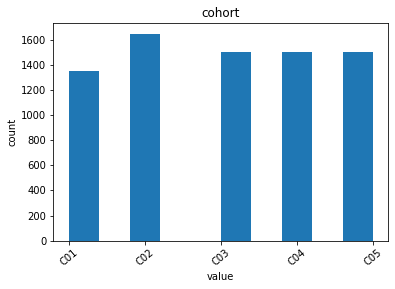

In [42]:
graph_columns = ['cohort']
for col in graph_columns:
    plt.title(col)
    plt.xlabel('value')
    plt.ylabel('count')
    plt.xticks(rotation = 40)
    plt.hist(locomotor_all[col].dropna())
    plt.show() 

In [80]:
#need to calculate total for each rfid at each time
df_groups = locomotor_all.groupby([ 'rfid','cohort','cage_x','locomotor_t1_experiment','locomotor_t1_time',
                                   'locomotor_t1_file_num','locomotor_t2_time','locomotor_t2_file_num',
                                   'locomotor_t2_experiment'],
                                  as_index = False)[['sample','locomotor_t1_total_distance','locomotor_t1_rest_time',
                                                     'locomotor_t1_rest_episode_count',
                                                     'locomotor_t1_movement_episode_count',
                                                     'locomotor_t1_vertical_activity_count',
                                                     'locomotor_t1_center_time_legacy','locomotor_t2_total_distance',
                                                     'locomotor_t2_rest_time','locomotor_t2_rest_episode_count',
                                                     'locomotor_t2_movement_episode_count',
                                                     'locomotor_t2_vertical_activity_count',
                                                     'locomotor_t2_center_time_legacy']].sum()
#print(locomotor_all.columns)
df_groups


,rfid,cohort,cage_x,locomotor_t1_experiment,locomotor_t1_time,locomotor_t1_file_num,locomotor_t2_time,locomotor_t2_file_num,locomotor_t2_experiment,sample,...,locomotor_t1_rest_episode_count,locomotor_t1_movement_episode_count,locomotor_t1_vertical_activity_count,locomotor_t1_center_time_legacy,locomotor_t2_total_distance,locomotor_t2_rest_time,locomotor_t2_rest_episode_count,locomotor_t2_movement_episode_count,locomotor_t2_vertical_activity_count,locomotor_t2_center_time_legacy
0,933000320045751,C02,4,U01-t1-gp20,t1,gp20,t2,gp20,U01-t2-gp20,120,...,130,139,1667,221.18,3011.69,432.70,136.0,143.0,1168.0,63.77
1,933000320045756,C02,4,U01-t1-gp27,t1,gp27,t2,gp27,U01-t2-gp27,120,...,141,141,868,10.54,1872.80,504.49,148.0,152.0,1109.0,15.39
2,933000320045757,C02,4,U01-t1-gp9,t1,gp9,t2,gp9,U01-t2-gp9,120,...,131,139,1703,151.58,3831.46,333.54,118.0,126.0,1135.0,54.23
3,933000320045759,C02,4,U01-t1-gp26,t1,gp26,t2,gp26,U01-t2-gp26,120,...,148,157,1569,110.57,3588.23,411.87,142.0,151.0,1350.0,93.32
4,933000320045760,C02,2,U01-t1-gp20,t1,gp20,t2,gp20,U01-t2-gp20,120,...,127,134,1297,454.05,1508.50,527.21,162.0,164.0,994.0,539.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,933000320187371,C05,4,U01-t1-gp25,t1,gp25,t2,gp25,U01-t2-gp25,120,...,134,142,1452,199.39,1801.18,513.65,152.0,155.0,996.0,90.15
492,933000320187372,C05,1,U01-t1-gp20,t1,gp20,t2,gp20,U01-t2-gp20,120,...,110,119,1749,108.24,2689.15,368.69,153.0,159.0,1578.0,87.50
493,933000320187373,C05,4,U01-t1-gp20,t1,gp20,t2,gp20,U01-t2-gp20,120,...,84,80,1073,41.92,2107.73,486.34,168.0,175.0,921.0,47.62
494,933000320187374,C05,4,U01-t1-gp16,t1,gp16,t2,gp16,U01-t2-gp16,120,...,138,146,1375,105.87,2602.75,404.15,168.0,175.0,1269.0,60.48


In [ ]:
#unsure of why 4 rows are eliminated when using cage_y
#wait till we get the information back from suzanne mitchell on the missing file

In [81]:

#save locomotor file
#df_groups.to_csv(r'C:\Users\cocoy\Dropbox (Palmer Lab)\Palmer Lab\Shae Ziegler\Suzanne_Mitchell_U01\locomotor.csv', index=False)
df_groups.to_csv(r'/Users/kendraziegler/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01/locomotor.csv', index=False)


In [ ]:
list(df_groups.columns.values)

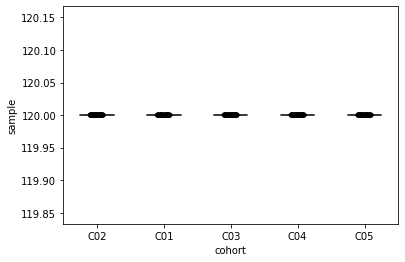

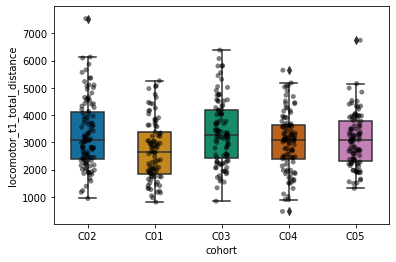

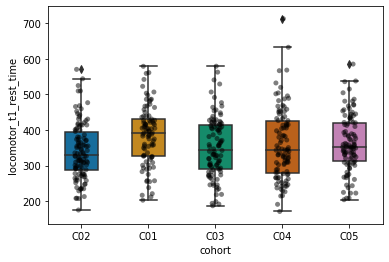

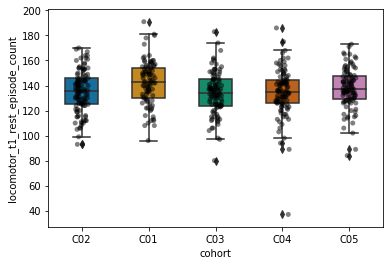

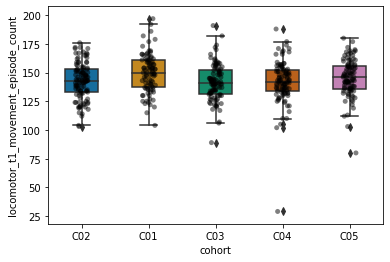

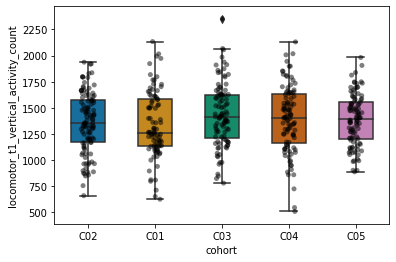

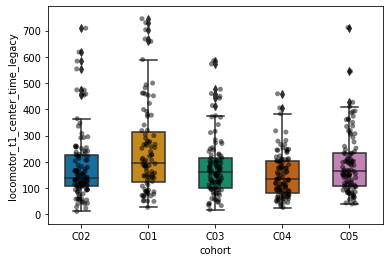

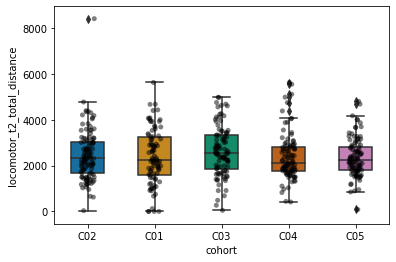

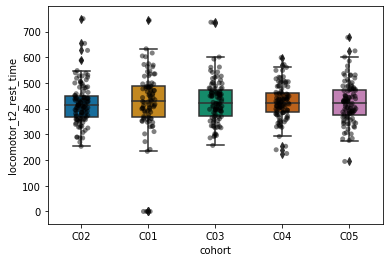

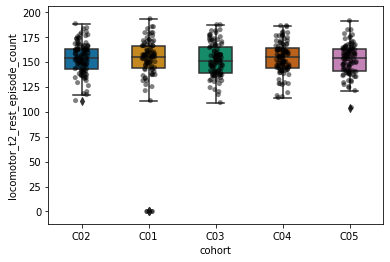

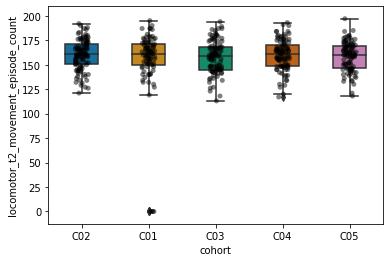

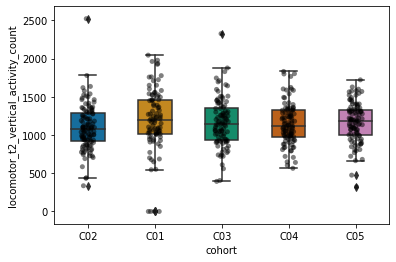

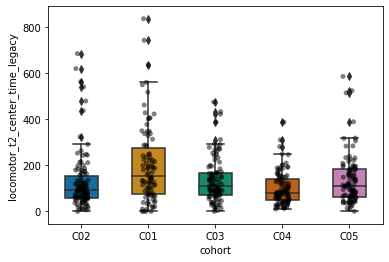

In [79]:
graph_columns = ['sample',
 'locomotor_t1_total_distance',
 'locomotor_t1_rest_time',
 'locomotor_t1_rest_episode_count',
 'locomotor_t1_movement_episode_count',
 'locomotor_t1_vertical_activity_count',
 'locomotor_t1_center_time_legacy',
 'locomotor_t2_total_distance',
 'locomotor_t2_rest_time',
 'locomotor_t2_rest_episode_count',
 'locomotor_t2_movement_episode_count',
 'locomotor_t2_vertical_activity_count',
 'locomotor_t2_center_time_legacy']
for col in graph_columns:
    sns.boxplot(y = col, x ='cohort', 
                     data = df_groups, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='cohort',
                        data=df_groups, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()